### 🎯 **Scenario Title**: *"The Admissions Algorithm"*

#### 🎓 Chapter 1: The University Dilemma

You are the data scientist at **Altair Tech University**, a futuristic institution that receives thousands of applications each year. The admissions committee wants to **automate the first stage** of the selection process using **logistic regression**.

Your mission is to **predict whether a student should be admitted (1) or not (0)** based on the following features:

* GPA (0.0 to 4.0)
* Entrance Exam Score (0 to 100)
* Number of Extracurricular Projects (0 to 10)

The committee has provided data from the past 500 applicants, including whether each applicant was admitted.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy

In [2]:
np.random.seed(40)
n_applicants = 500

In [3]:
gpa = np.round(np.random.uniform(0,4,n_applicants),1)
exam_score = np.random.randint(40,100,n_applicants)
projects = np.random.randint(0,11,n_applicants)

In [4]:
z = 1.5 * gpa + 0.05 * exam_score + 0.4 * projects - 6
prob = 1 / (1 + np.exp(-z))
admitted = np.random.binomial(1, prob)

In [5]:
admission_df = pd.DataFrame({
    'GPA' : gpa,
    'Exam_score': exam_score,
    'Projects' : projects,
    'Admitted' : admitted}
)
admission_df.head()

,GPA,Exam_score,Projects,Admitted
0,1.6,51,9,1
1,0.2,56,5,0
2,3.2,52,9,1
3,1.1,90,5,1
4,1.8,71,8,1


In [6]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GPA         500 non-null    float64
 1   Exam_score  500 non-null    int64  
 2   Projects    500 non-null    int64  
 3   Admitted    500 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


In [7]:
admission_df.describe()

,GPA,Exam_score,Projects,Admitted
count,500.000000,500.00000,500.000000,500.000000
mean,1.933600,69.19200,4.994000,0.786000
std,1.150599,16.96723,3.079111,0.410538
min,0.000000,40.00000,0.000000,0.000000
25%,1.000000,54.00000,2.000000,1.000000
50%,1.950000,70.00000,5.000000,1.000000
75%,2.900000,84.00000,8.000000,1.000000
max,4.000000,99.00000,10.000000,1.000000


In [8]:
# How many Students were admitted ?
n_admitted_students = np.sum(admission_df.Admitted == 1)
percent_admitted_students = n_admitted_students * 100 / n_applicants
print(f"{n_admitted_students} were Admitted which is {percent_admitted_students}% of totall applicants")

393 were Admitted which is 78.6% of totall applicants


In [9]:
# What was the range of GPAs for Admitted Students
admitted_applicants = None
admitted_applicants = admission_df[admission_df.Admitted == 1]
min_admitted_gpa = admitted_applicants.GPA.min()
max_admitted_gpa = admitted_applicants.GPA.max()
mean_admitted_gpa = admitted_applicants.GPA.mean()
print(f"Applicated were admitted with GPA in range of ({min_admitted_gpa}, {max_admitted_gpa})\nThe Average of GPA = {mean_admitted_gpa}")

Applicated were admitted with GPA in range of (0.0, 4.0)
The Average of GPA = 2.1643765903307886


In [10]:
# Are there Missing values
missing_values = admission_df.isna().sum()

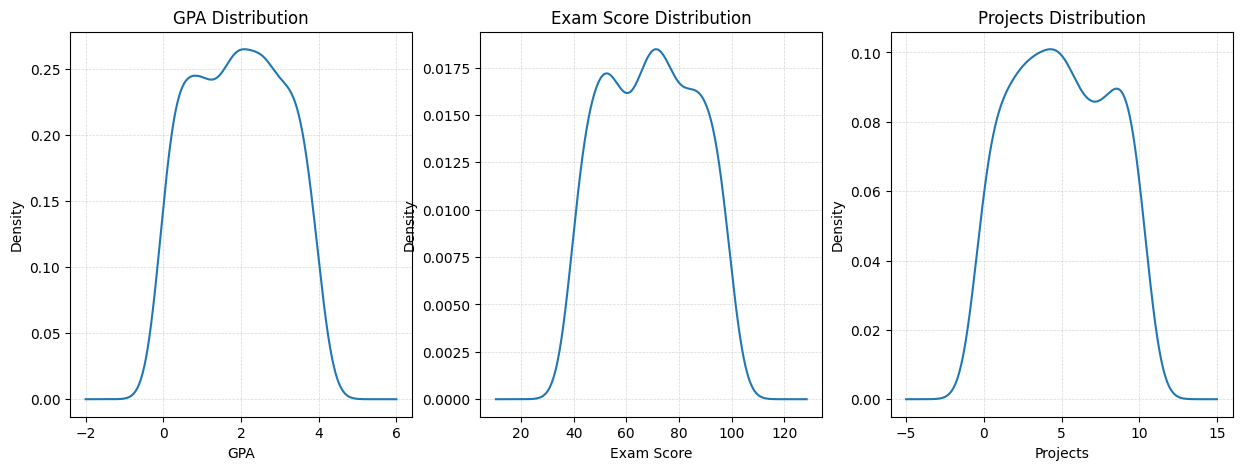

In [11]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3)
ax = ax.flatten()

admission_df.GPA.plot(kind='kde', ax=ax[0])
admission_df.Exam_score.plot(kind='kde', ax=ax[1])
admission_df.Projects.plot(kind='kde', ax=ax[2])

ax[0].set_xlabel("GPA")
ax[1].set_xlabel("Exam Score")
ax[2].set_xlabel("Projects")

ax[0].set_title("GPA Distribution")
ax[1].set_title("Exam Score Distribution")
ax[2].set_title("Projects Distribution")

for i in range(len(ax)):
    ax[i].grid(axis='both', lw=0.5, alpha=0.5, linestyle='--')

<Axes: >

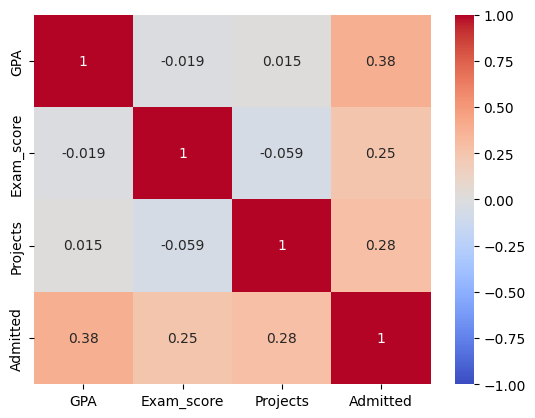

In [12]:
sns.heatmap(admission_df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

<h2>📘 Chapter 2: Modeling the Decision — “Train the Gatekeeper”</h2>
🎯 Your objective:
Build a logistic regression model that can predict whether a student should be admitted based on:

* GPA
* Exam Score
* Number of Projects

In [13]:
def sigmoid_function (z):
    """
    Compute sigmoid of z
    Args:
        z (ndarray (m,)) : m training example
    Returns:
        prediction g(z): same shape as z
    """
    return 1 / (1 + np.exp(-z))

In [14]:
def compute_output (x, w, b):
    """
    output logistic regression output
    Args:
        x (ndarray (m, n)) : m examples with n features
        w (ndarray (n)) : model paramters
        b (scalar) : model bias
    Returns:
        f_wb (ndarray (m,)) : output of logistic regression regression
    """
    z = np.dot(x, w) + b
    return sigmoid_function(z)

In [15]:
def compute_cost (x, y , w, b):
    """
    output cost for logistic regression : tells us how well our model is doing
    Args:
        x (ndarray (m, n)) : m examples with n features
        y (ndarray (m,)) : target values
        w (ndarray (n)) : model paramters
        b (scalar) : model bias
    Returns:
        J_wb(scalar) : output of logistic regression output
    """
    m = y.shape[0]
    f_wb = compute_output(x, w, b)
    epsilon = 1e-15
    loss = y * np.log(f_wb + epsilon) + (1 - y) * np.log(1 - f_wb + epsilon)
    cost = (-1/m) * np.sum(loss)
    return cost

In [16]:
def compute_gradient (x, y, w, b):
    """
    output logistic regression output
    Args:
        x (ndarray (m, n)) : m examples with 
        y (ndarray (m,)) : target values
        w (ndarray (n)) : model paramters
        b (scalar) : model bias
    Returns:
        dj_dw (ndarray , (n,)) : derivide of cost w.r.t. w paramter
        dj_db (scalar)         : derivide of cost w.r.t. b paramter
    """
    m = y.shape[0]
    f_wb = compute_output(x, w, b)
    dj_dw = np.dot(x.T , f_wb - y) * (1/m)
    dj_db = np.sum(f_wb - y) * (1/m)
    return dj_dw, dj_db

In [17]:
def gradient_descent (x, y, w_in, b_in, alpha, num_iter, cost_function, gradient_function, tolerance=1e-15):
    """
    Args:
        x (ndarray (m,n)) Feature variable with m examples and n features
        y (ndarray (m,)) Target variable
        w_in (ndarray , (n,)) : initialization of vector w
        b_in (scalar) : initialization b
        alpha (float) : learning rate
        num_iter (int): number of iteration for gradient descent
        cost_function : how well the model is doing on the entire training set
        gradient function : generate dj_dw, dj_db
        tolerance : when to stop the gradient descent
    Returns:
        w (ndarray (n,)) : weights after the gradient descent
        b (scalar): b after the gradient descent 
        J_history (list) : list of cost function history
    """
    w = copy.deepcopy(w_in)
    b = b_in
    J_history = list()

    for i in range(num_iter):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if (i < 100000):
            J_history.append(cost_function(x,y,w,b))

        if i % math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:5d} : Cost = {J_history[-1]:8.4f}")

        if i > 0 and abs(J_history[-1] - J_history[-2]) < tolerance:
            print(f"Converges at index {i}")
            break
    return w, b, J_history

Iteration     0 : Cost =   1.1932
Iteration 10000 : Cost =   0.4941
Iteration 20000 : Cost =   0.5527
Iteration 30000 : Cost =   0.5059
Iteration 40000 : Cost =   0.4680
Iteration 50000 : Cost =   0.4379
Iteration 60000 : Cost =   0.4145
Iteration 70000 : Cost =   0.3963
Iteration 80000 : Cost =   0.3823
Iteration 90000 : Cost =   0.3716
w = [1.26935309 0.04608586 0.33516736]
b=-5.7666
Cost=0.35441400218028957


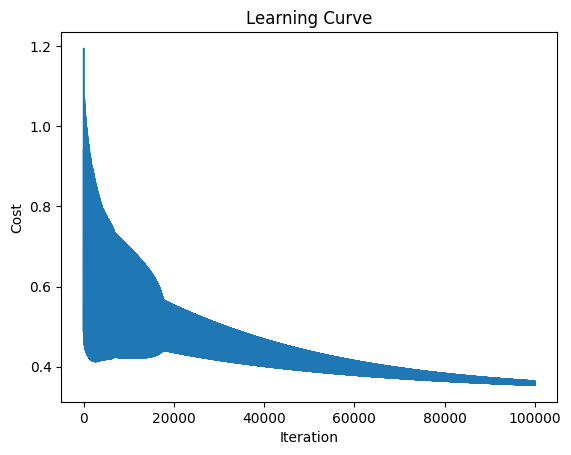

In [18]:
w_init = np.zeros(len(admission_df.columns) - 1)
b_init = 0
alpha = 0.0042
iterations = 100000

w_final, b_final, J_hist = gradient_descent(admission_df.iloc[:, :-1], admission_df.iloc[:, -1], 
                                            w_init, b_init, alpha, iterations, compute_cost, compute_gradient)

plt.plot(J_hist)
plt.title("Learning Curve")
plt.xlabel("Iteration")
plt.ylabel("Cost")

print(f"w = {w_final}\nb={b_final:.4f}\nCost={compute_cost(admission_df.iloc[:, :-1], admission_df.iloc[:, -1], w_final, b_final)}")

In [19]:
predictions = compute_output(admission_df.iloc[:, :-1], w_final,b_final)
predicted_labels = (predictions > 0.5).astype(int)

In [20]:
accuracy = np.mean(predicted_labels == admission_df.Admitted)
print(f"Accuracy : {accuracy * 100:.2f}%")

Accuracy : 85.80%


In [21]:
def precision_score (y_pred, y):
    TP = np.sum((y_pred == 1) & (y == 1))
    FP = np.sum((y_pred == 1) & (y == 0))
    precision = TP / (TP + FP + 1e-15)
    return precision

print(f"Precision = {precision_score(predicted_labels, admission_df.iloc[:, -1]) * 100 :.2f}%")

Precision = 91.71%


In [22]:
def recall_score (y_pred, y):
    TP = np.sum((y_pred == 1) & (y == 1))
    FN = np.sum((y_pred == 0) & (y == 1))
    recall = TP / (TP + FN + 1e-15)
    return recall

print(f"Recall = {recall_score(predicted_labels, admission_df.iloc[:, -1]) * 100 :.2f}%")

Recall = 90.08%


In [23]:
def compute_f1_score(y_pred, y):
    precision = precision_score(y_pred, y)
    recall = recall_score(y_pred, y)
    return 2 * (precision * recall) / (precision + recall + 1e-15)

print(f"F1 Score = {compute_f1_score(predicted_labels, admission_df.iloc[:, -1]) * 100 :.2f}%")

F1 Score = 90.89%


In [24]:
def predict_applicant (gpa, exam_score, projects):
    x_input = [gpa, exam_score, projects]
    probability = compute_output(x_input, w_final, b_final)
    result = "Admitted" if probability >= 0.5 else "Rejected"
    return result

In [25]:
applicant_gpa = float(input("Enter Your GPA : "))
applicant_Exam_score = float(input("Enter Your Exam Score : "))
applicant_Projects = int(input("Enter Number of Projects : "))
result = predict_applicant(applicant_gpa, applicant_Exam_score, applicant_Projects)
print(result)

Enter Your GPA :  2
Enter Your Exam Score :  50
Enter Number of Projects :  2


Rejected
